In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
# 한글 표시
plt.rc('font',family='Malgun Gothic')

#### 시각화 도구, 라이브러리
import matplotlib.pyplot as plt  # 기본, 그래프 + 그래프를 꾸미는거, 크기, 등등
import seaborn as sns   # 데이터 제공 + 데이터분석(통계)에 도움되는 그래프(판다스 호환)

+ 판다스 자체 그래프 그리는 함수
import plotly   # 3d 그래프에 강점
import folium   # 지도 그래프 강점

### Matplotlib.pyplot 로 그래드 그리기

In [15]:
anscombe=sns.load_dataset('anscombe')
anscombe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dataset  44 non-null     object 
 1   x        44 non-null     float64
 2   y        44 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.2+ KB


In [ ]:
dataset_1=anscombe[anscombe['dataset']=='I']
dataset_2=anscombe[anscombe['dataset']=='II']
dataset_3=anscombe[anscombe['dataset']=='III']
dataset_4=anscombe[anscombe['dataset']=='IV']
plt.plot(dataset_1['x'],dataset_1['y'], 'o')
plt.plot(dataset_2['x'],dataset_2['y'], 'o')
plt.plot(dataset_3['x'],dataset_3['y'], 'o')
plt.plot(dataset_4['x'],dataset_4['y'], 'o')
plt.show()

In [ ]:
fig=plt.figure()
axes_1=fig.add_subplot(2,2,1)
axes_2=fig.add_subplot(2,2,2)
axes_3=fig.add_subplot(2,2,3)
axes_4=fig.add_subplot(2,2,4)

axes_1.plot(dataset_1['x'],dataset_1['y'], 'o', color='green')
axes_2.plot(dataset_2['x'],dataset_2['y'], 'o', color='pink')
axes_3.plot(dataset_3['x'],dataset_3['y'], 'o', color='blue')
axes_4.plot(dataset_4['x'],dataset_4['y'], 'o', color='yellow')

axes_1.set_title('dataset_1')
axes_2.set_title('dataset_2')
axes_3.set_title('dataset_3')
axes_4.set_title('dataset_4')

fig.suptitle('Andscombe Data')
fig.set_tight_layout(True)
plt.show()

In [17]:
tips=sns.load_dataset('tips')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


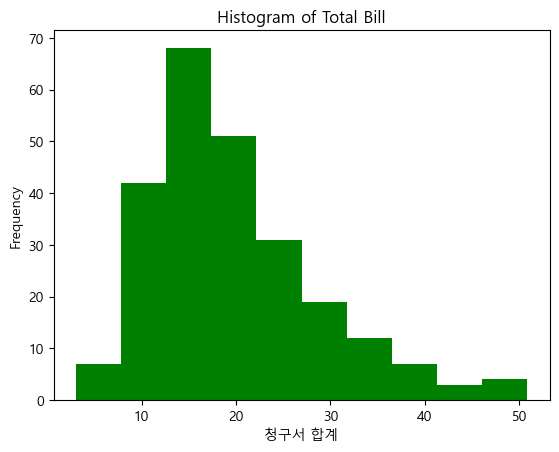

In [8]:
fig=plt.figure()
axes1=fig.add_subplot(1,1,1)
axes1.hist(data=tips,x='total_bill',bins=10, color='g')  #data는 따옴표 없이
axes1.set_title('Histogram of Total Bill')
axes1.set_xlabel('청구서 합계')
axes1.set_ylabel('Frequency')
plt.show()

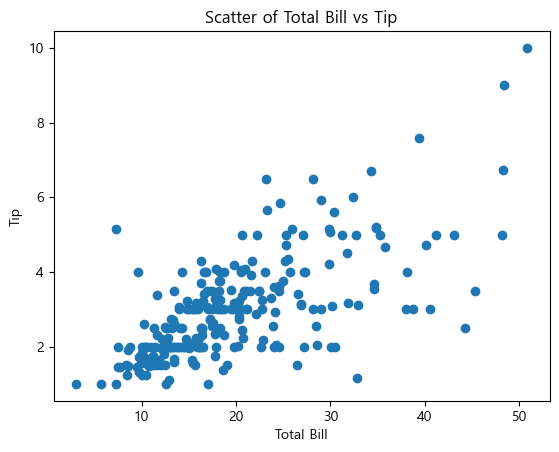

In [9]:
scatter_plot=plt.figure()
axes1=scatter_plot.add_subplot(1,1,1)
axes1.scatter(tips['total_bill'], tips['tip'])
axes1.set_title('Scatter of Total Bill vs Tip')
axes1.set_xlabel('Total Bill')
axes1.set_ylabel('Tip')
plt.show()

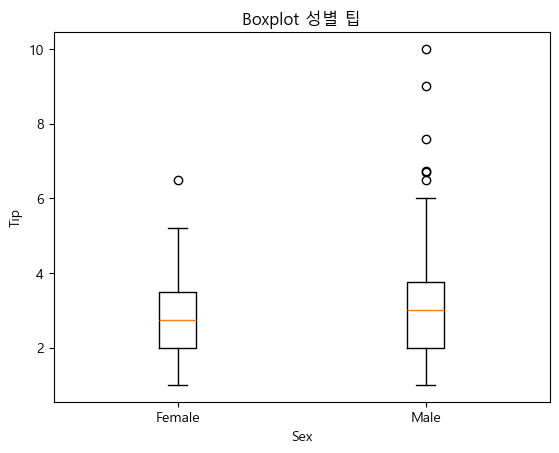

In [34]:
## 성별 팁
fig=plt.figure()
axes2=fig.add_subplot(1,1,1)
axes2.boxplot(
    x=[tips[tips['sex']=='Female']['tip'],
      tips[tips['sex']=='Male']['tip']],
    labels=['Female','Male'],
)
axes2.set_title('Boxplot 성별 팁')
axes2.set_xlabel('Sex')
axes2.set_ylabel('Tip')
plt.show()

In [ ]:
# 선생님 ppt에서 게산한 사분위/박스플롯 total_bill

series=[]
for group in tips.groupby('sex')['total_bill']:
    series.append(group[1])
series

Text(0, 0.5, 'Total_bill')

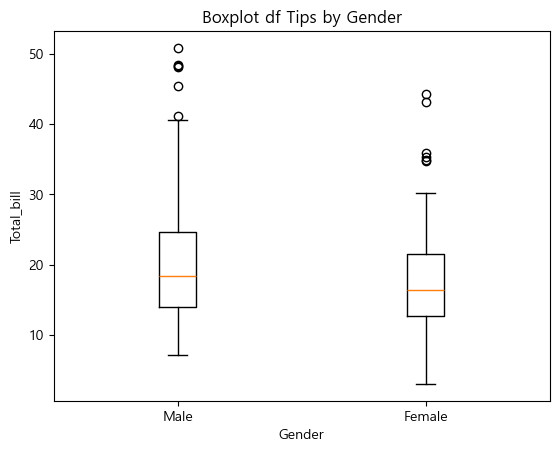

In [29]:
box1=plt.boxplot(series, labels=['Male','Female'])
plt.title('Boxplot df Tips by Gender')
plt.xlabel('Gender')
plt.ylabel('Total_bill')

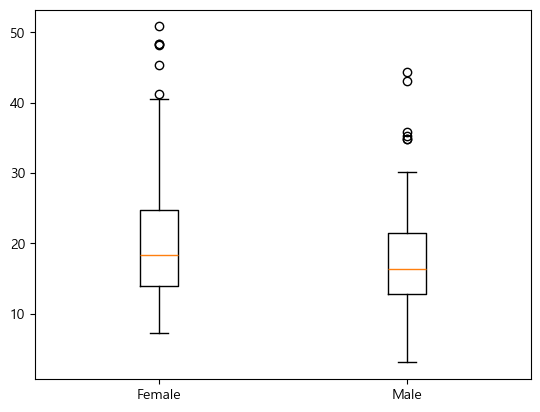

In [32]:
fig=plt.figure()
axes2=fig.add_subplot(1,1,1)
axes2.boxplot(
    x=[ tips[tips['sex']=='Male']['total_bill'],
        tips[tips['sex']=='Female']['total_bill']],
    labels=['Female','Male'],
)
plt.show()

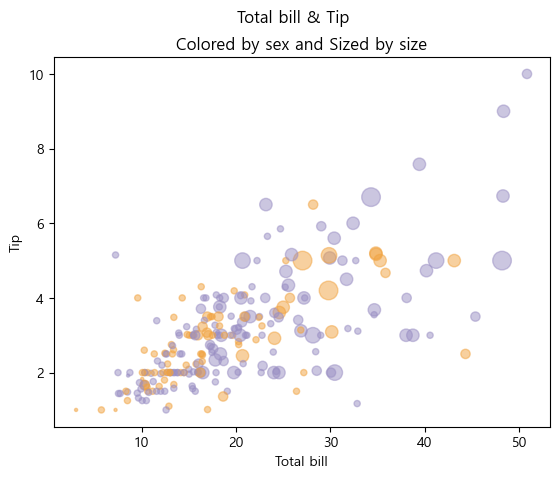

In [11]:
colors={'Female':'#f1a340','Male':'#998ec3'}
scatter_plot=plt.figure()
axes3=scatter_plot.add_subplot(1,1,1)
axes3.scatter(data=tips, 
              x='total_bill', y='tip',
              s=tips['size']**2*5, 
              c=tips['sex'].map(colors),alpha=0.5)
axes3.set_title('Colored by sex and Sized by size')
axes3.set_xlabel('Total bill')
axes3.set_ylabel('Tip')
scatter_plot.suptitle('Total bill & Tip')
plt.show()

### Saeborn으로 그래프 그리기

In [45]:
sns.set_context("paper")

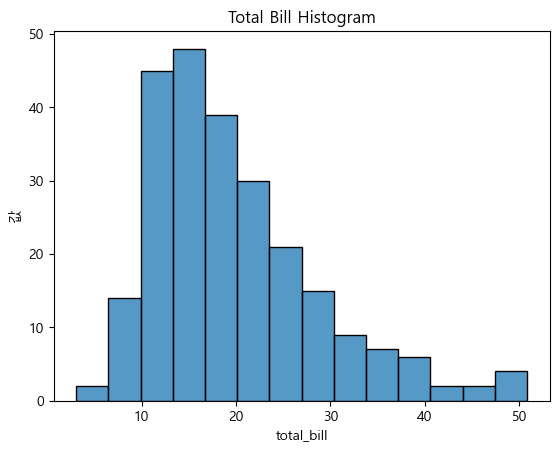

In [12]:
# 일변량 그래프
hist, ax=plt.subplots()
sns.histplot(data=tips, x='total_bill', ax=ax)
ax.set_title('Total Bill Histogram')
ax.set_ylabel('값')
plt.show()

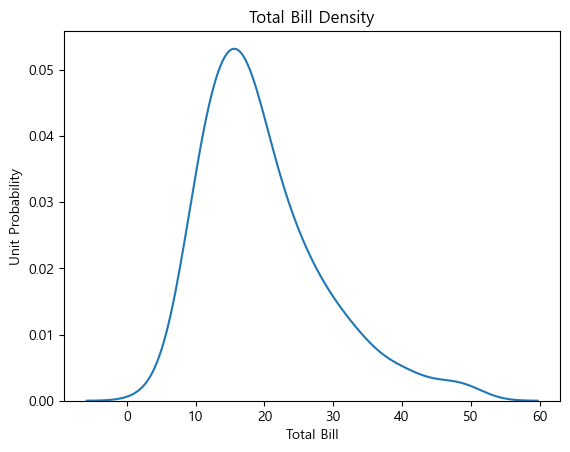

In [18]:
den, ax=plt.subplots()
sns.kdeplot(data=tips, x='total_bill', ax=ax)
ax.set_title('Total Bill Density')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Unit Probability')
plt.show()

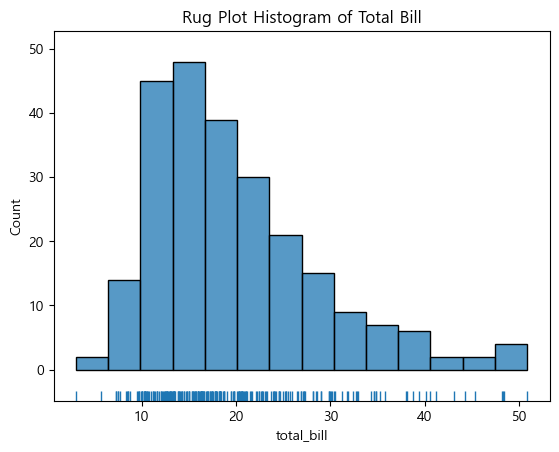

In [19]:
rug, ax=plt.subplots()
sns.rugplot(data=tips, x='total_bill', ax=ax)
sns.histplot(data=tips, x='total_bill', ax=ax)
ax.set_title('Rug Plot Histogram of Total Bill')
plt.show()

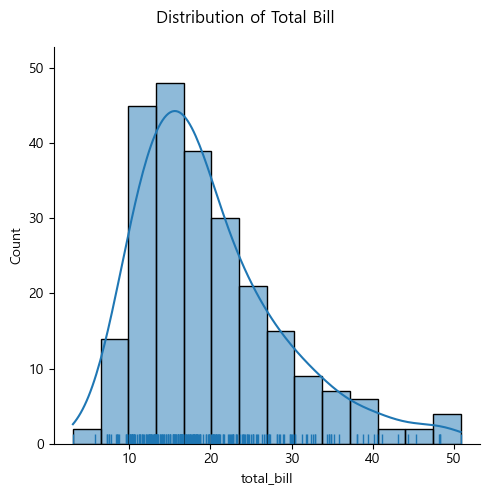

In [21]:
# displot  / FacetGrid 
fig=sns.displot(data=tips, x='total_bill', kde=True, rug=True)
fig.set_axis_labels(x_bar='Total Bill', y_bar='Count')
fig.figure.suptitle('Distribution of Total Bill')
plt.tight_layout()
plt.show()

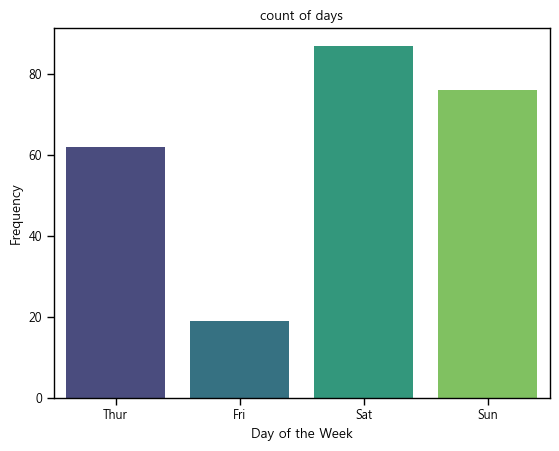

In [63]:
count, ax=plt.subplots()
sns.countplot(data=tips, x='day', palette='viridis',ax=ax)

ax.set_title('count of days')
ax.set_xlabel('Day of the Week')
ax.set_ylabel('Frequency')
plt.show()

In [ ]:
# 이변량 그래프

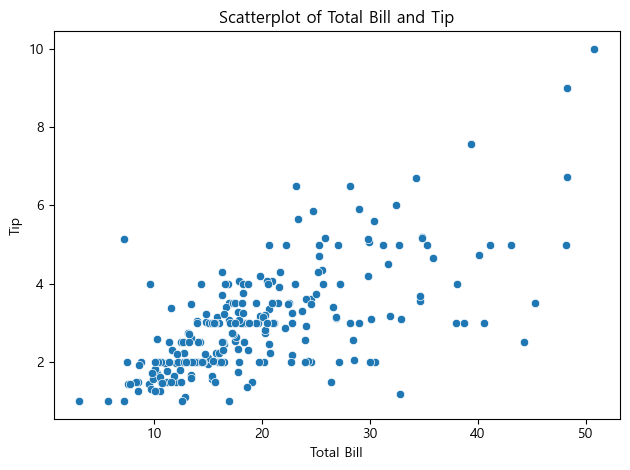

In [22]:
# 1. 산점도 그래프 그리기 
# 방법1 - Axis 객체 생성
scatter, ax=plt.subplots()

sns.scatterplot(data=tips, x='total_bill',y='tip', ax=ax)
ax.set_title('Scatterplot of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.tight_layout()
plt.show()

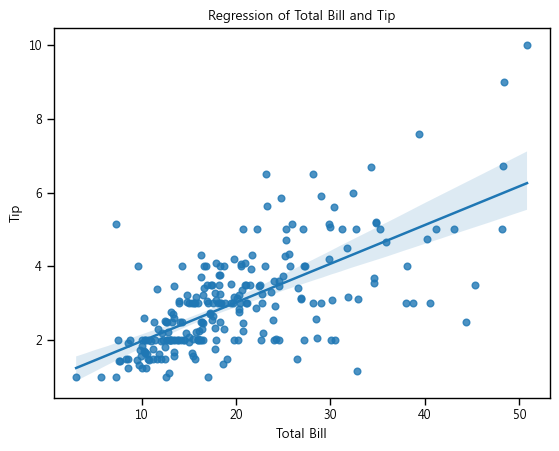

In [72]:
# 방법2 -regplot 회귀선과 함께, FacetGrid 
reg, ax=plt.subplots()

sns.regplot(data=tips, x='total_bill',y='tip', ax=ax, fit_reg=True)
ax.set_title('Regression of Total Bill and Tip')
ax.set_xlabel('Total Bill')
ax.set_ylabel('Tip')
plt.show()

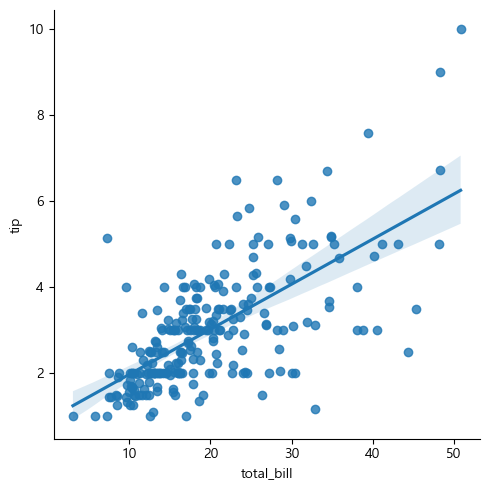

In [23]:
# sns.lmplot : 그림영역 직접 생산/ FacetGrid 객체 생성
fig=sns.lmplot(data=tips, x='total_bill',y='tip')
plt.show()